Shape: (202599, 41)
Columns: ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair'] ...

Missing values per column:
 0


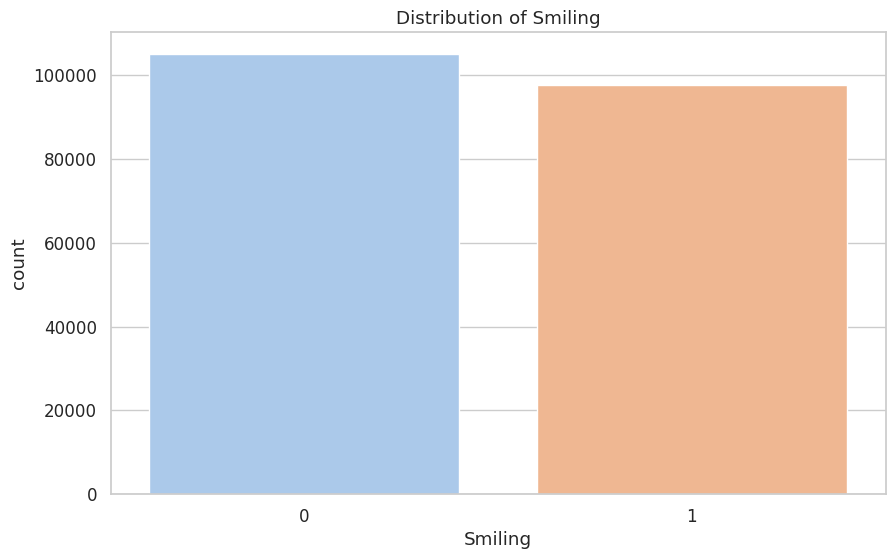

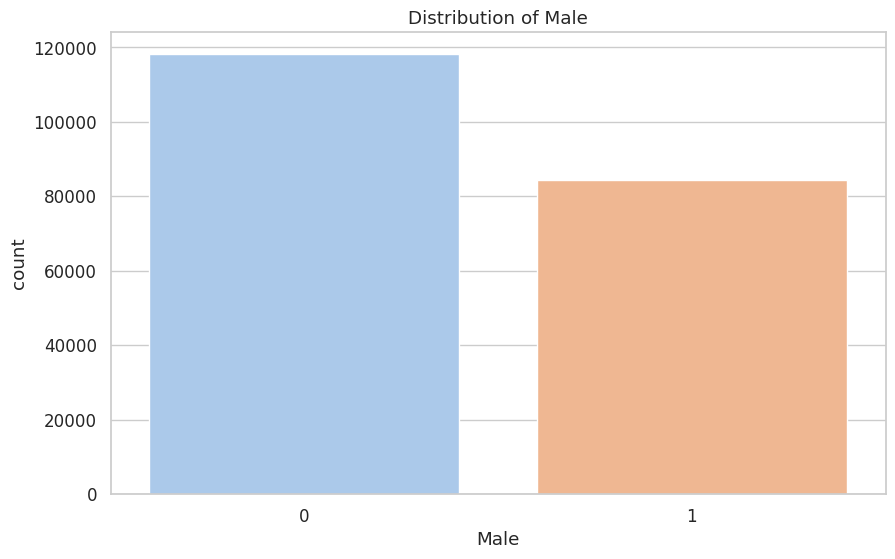

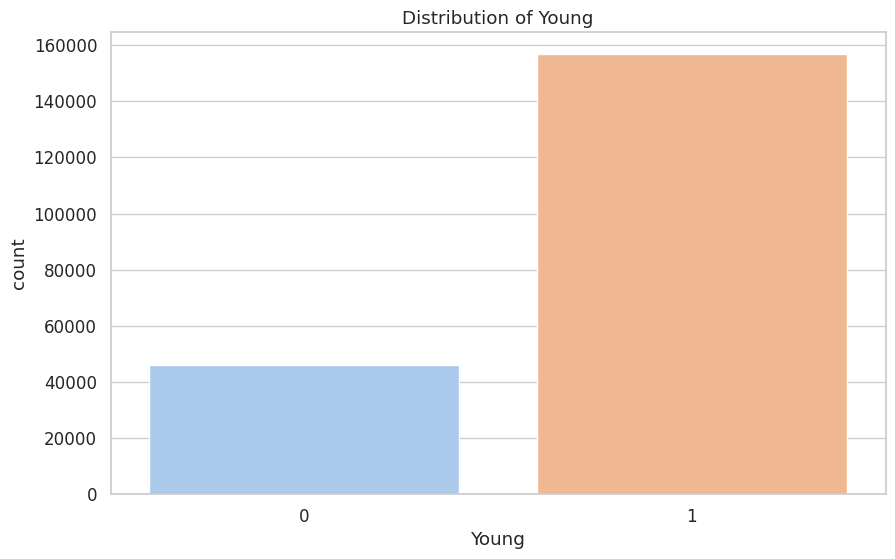

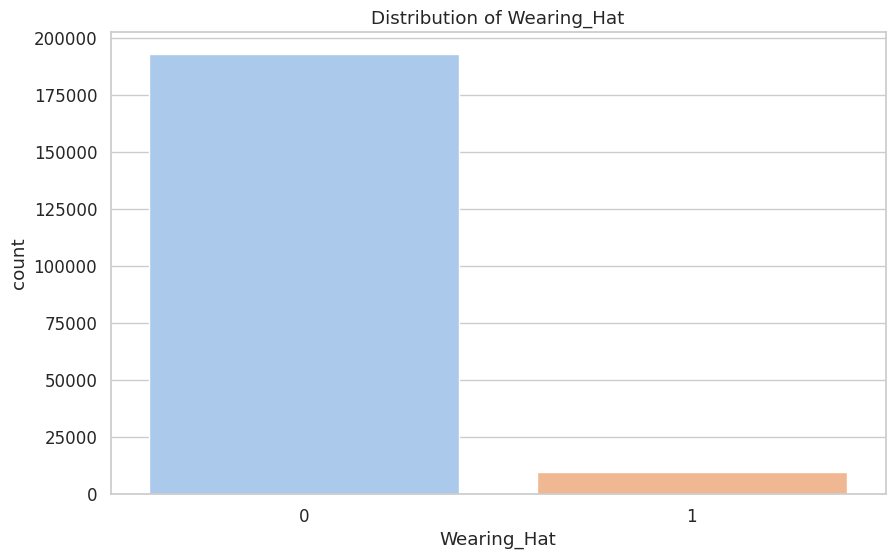

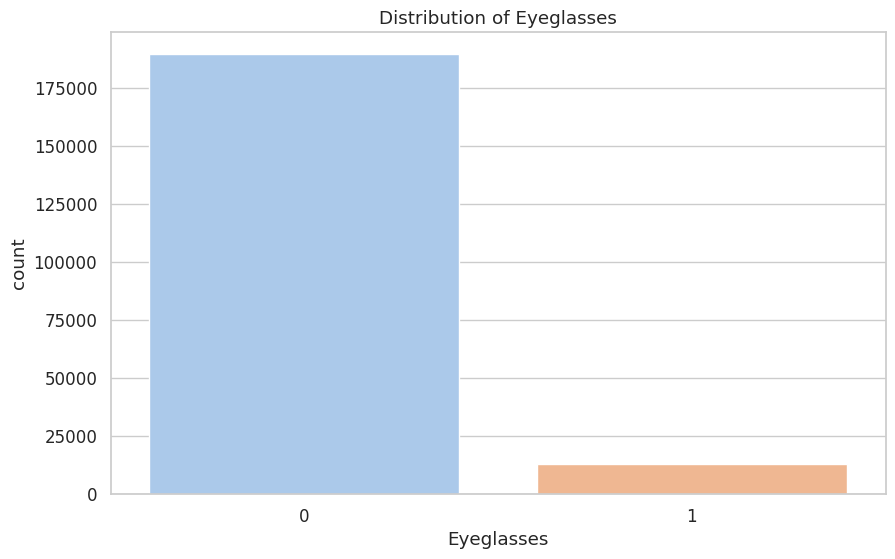

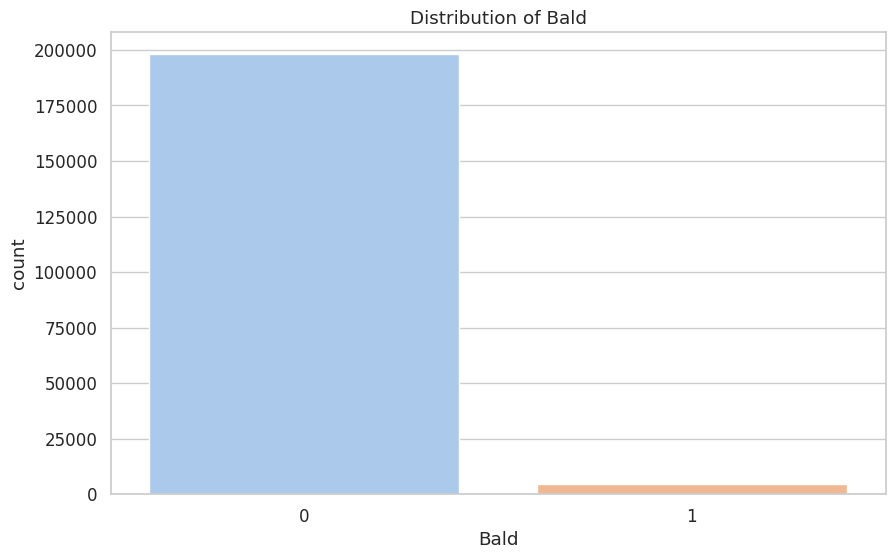

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


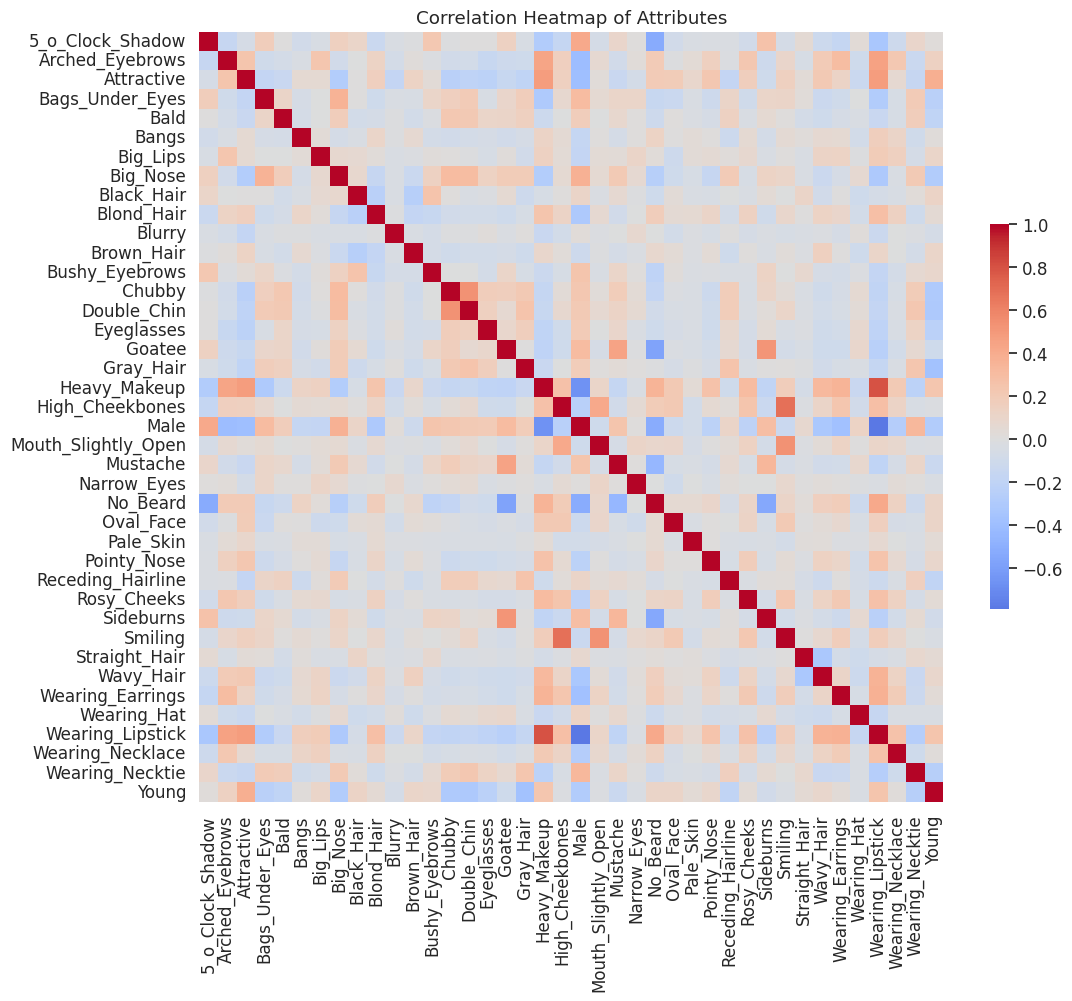


Top 10 Positive Correlations:
 Wearing_Lipstick  Heavy_Makeup           0.801539
High_Cheekbones   Smiling                0.683497
Smiling           Mouth_Slightly_Open    0.536379
Chubby            Double_Chin            0.533713
Goatee            Sideburns              0.512893
Attractive        Wearing_Lipstick       0.480104
Heavy_Makeup      Attractive             0.477084
Arched_Eyebrows   Wearing_Lipstick       0.460409
Goatee            Mustache               0.450540
Heavy_Makeup      Arched_Eyebrows        0.439645
dtype: float64

Top 10 Negative Correlations:
 Male              Wearing_Earrings   -0.373469
                  Attractive         -0.394451
Arched_Eyebrows   Male               -0.408016
No_Beard          Mustache           -0.452595
                  Male               -0.522243
                  5_o_Clock_Shadow   -0.526946
                  Sideburns          -0.543061
                  Goatee             -0.570071
Heavy_Makeup      Male               -0.66672

/tmp/ipykernel_48/2722929154.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=attr_df, x='Male', y=attr, ci=None)


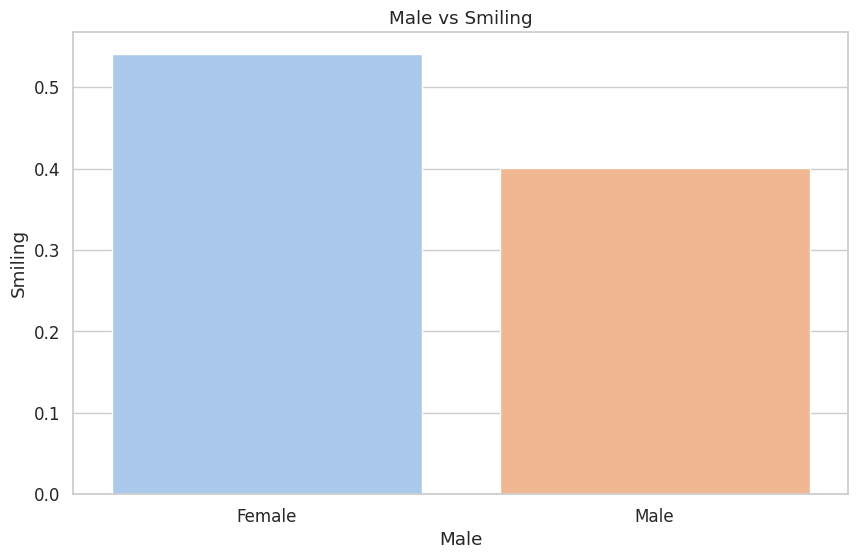

/tmp/ipykernel_48/2722929154.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=attr_df, x='Male', y=attr, ci=None)


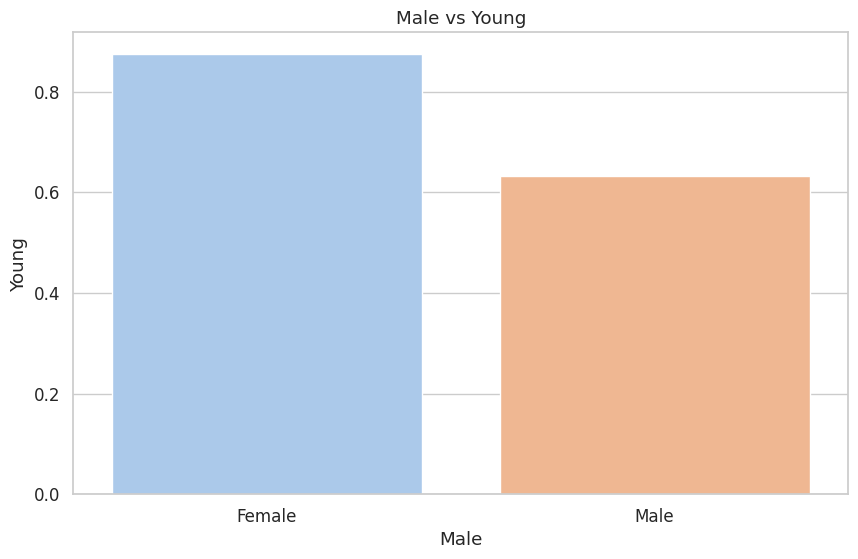

/tmp/ipykernel_48/2722929154.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=attr_df, x='Male', y=attr, ci=None)


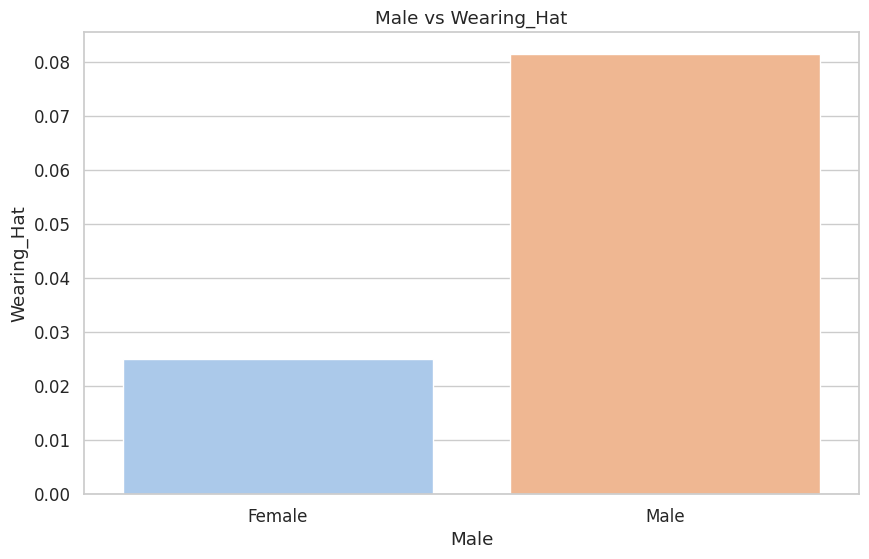

/tmp/ipykernel_48/2722929154.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=attr_df, x='Male', y=attr, ci=None)


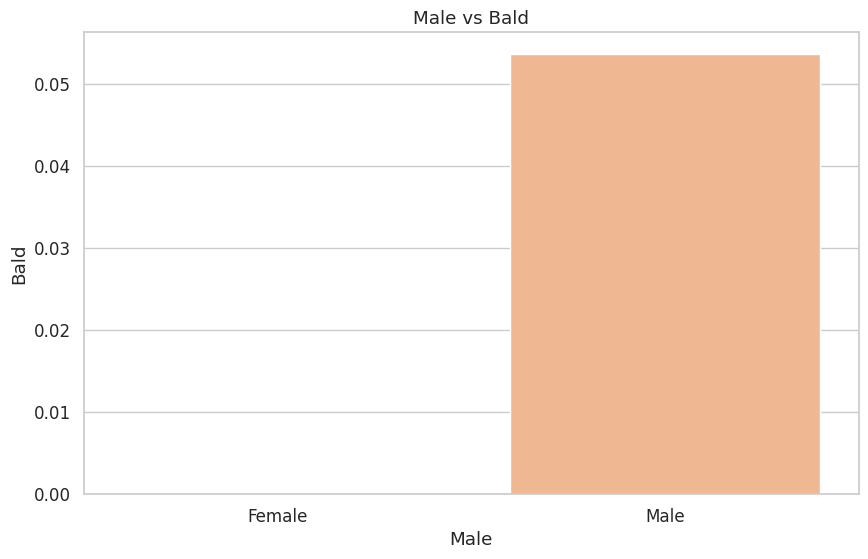

/tmp/ipykernel_48/2722929154.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=attr_df, x='Male', y=attr, ci=None)


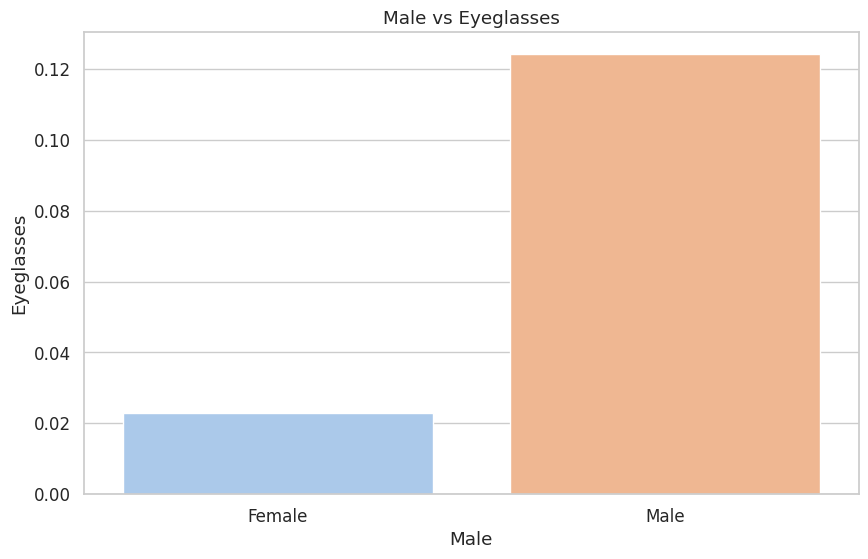

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

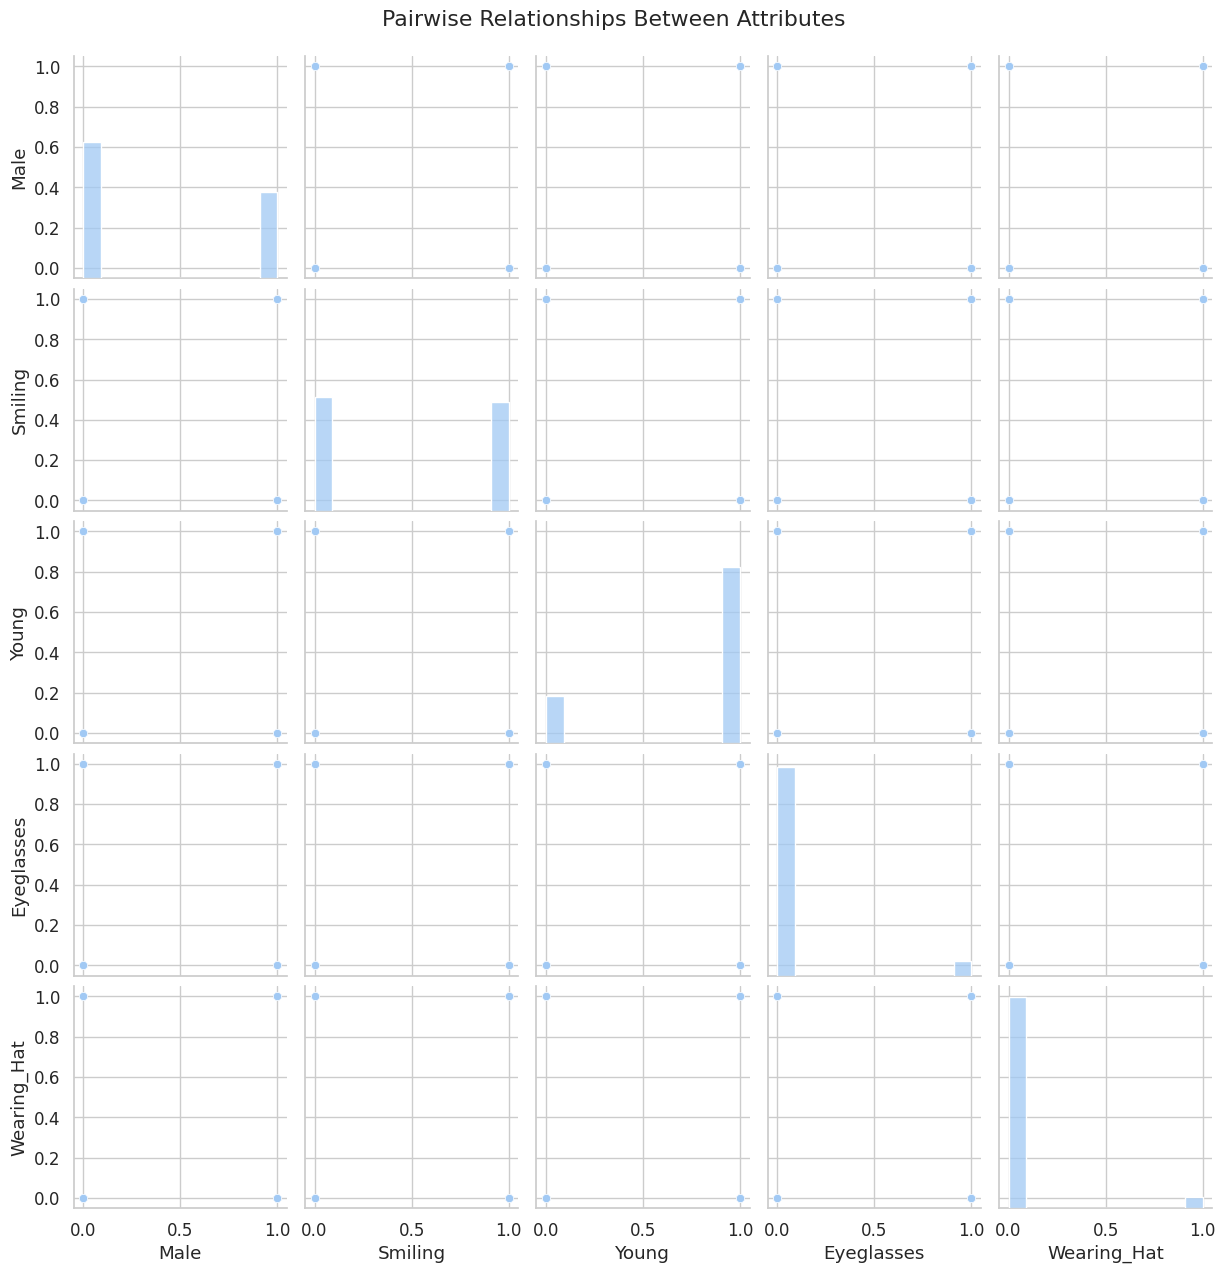


Proportion of Smiling Individuals:
Female: 0.54
Male:   0.40

Top 10 attributes correlated with 'Smiling':
 Smiling                1.000000
High_Cheekbones        0.683497
Mouth_Slightly_Open    0.536379
Rosy_Cheeks            0.221010
Oval_Face              0.205818
Wearing_Lipstick       0.181631
Heavy_Makeup           0.176627
Wearing_Earrings       0.170255
Attractive             0.147845
No_Beard               0.112774
Name: Smiling, dtype: float64

Bottom 10 attributes correlated with 'Smiling':
 Young              -0.033196
Eyeglasses         -0.042361
Blurry             -0.053492
Wearing_Hat        -0.063990
Mustache           -0.067257
5_o_Clock_Shadow   -0.067777
Pale_Skin          -0.070629
Goatee             -0.075189
Sideburns          -0.080569
Male               -0.138366
Name: Smiling, dtype: float64


In [2]:
# EDA for CelebA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

data_path = "/kaggle/input/celeba-dataset/list_attr_celeba.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:10], "...")

df.replace(-1, 0, inplace=True)

if 'image_id' not in df.columns:
    df.rename(columns={df.columns[0]: 'image_id'}, inplace=True)

attr_df = df.drop(columns=['image_id'])

print("\nMissing values per column:\n", attr_df.isnull().sum().sum())

attributes_to_plot = ['Smiling', 'Male', 'Young', 'Wearing_Hat', 'Eyeglasses', 'Bald']
for attr in attributes_to_plot:
    sns.countplot(data=attr_df, x=attr)
    plt.title(f"Distribution of {attr}")
    plt.show()

corr_matrix = attr_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar_kws={"shrink": 0.5})
plt.title("Correlation Heatmap of Attributes")
plt.show()

corr_pairs = (
    corr_matrix.unstack()
    .sort_values(kind="quicksort", ascending=False)
    .drop_duplicates()
)

print("\nTop 10 Positive Correlations:\n", corr_pairs[corr_pairs < 1].head(10))
print("\nTop 10 Negative Correlations:\n", corr_pairs.tail(10))

gender_relations = ['Smiling', 'Young', 'Wearing_Hat', 'Bald', 'Eyeglasses']
for attr in gender_relations:
    sns.barplot(data=attr_df, x='Male', y=attr, ci=None)
    plt.title(f"Male vs {attr}")
    plt.xticks([0, 1], ['Female', 'Male'])
    plt.show()

selected_attrs = ['Male', 'Smiling', 'Young', 'Eyeglasses', 'Wearing_Hat']
sns.pairplot(attr_df[selected_attrs].sample(1000))
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

smile_gender = attr_df.groupby('Male')['Smiling'].mean()
print("\nProportion of Smiling Individuals:")
print(f"Female: {smile_gender[0]:.2f}")
print(f"Male:   {smile_gender[1]:.2f}")

top_corr_with_smiling = corr_matrix['Smiling'].sort_values(ascending=False)
print("\nTop 10 attributes correlated with 'Smiling':\n", top_corr_with_smiling.head(10))
print("\nBottom 10 attributes correlated with 'Smiling':\n", top_corr_with_smiling.tail(10))

